In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=b99b3c1faa997f79800c769e5fe5346560f4553e5cd749de52ee766fd04e1823
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


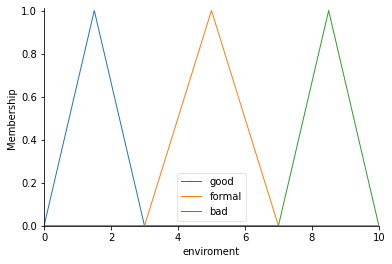

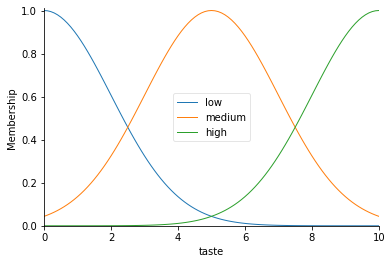

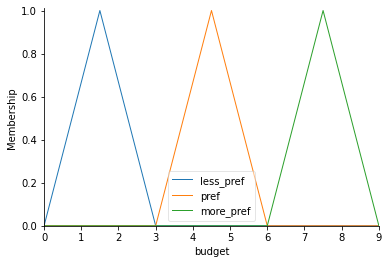

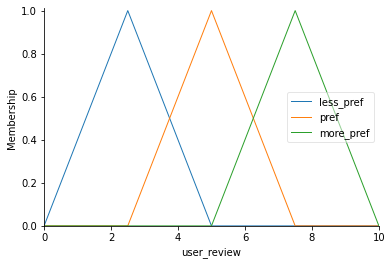

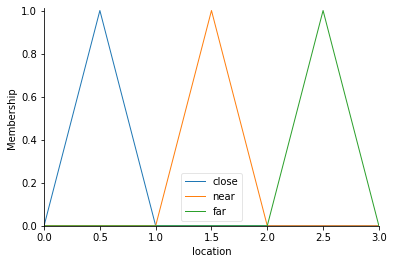

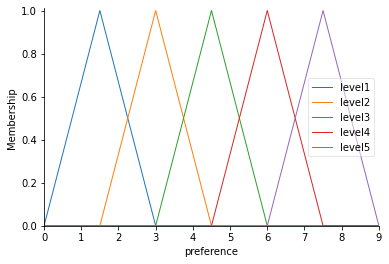

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
#input variable 
enviroment = ctrl.Antecedent(np.arange(0,10.1,0.1),'enviroment')
taste = ctrl.Antecedent(np.arange(0,10.1,0.1),'taste')
budget = ctrl.Antecedent(np.arange(0,9.1,0.1),'budget')
user_review = ctrl.Antecedent(np.arange(0,10.1,0.1),'user_review')
location = ctrl.Antecedent(np.arange(0,3.1,0.1),'location')
#output need to predict
preference = ctrl.Consequent(np.arange(0,9.1,0.1),'preference')

enviroment['good'] = fuzz.trimf(enviroment.universe,[0,1.5,3])
enviroment['formal'] = fuzz.trimf(enviroment.universe,[3,5,7])
enviroment['bad'] = fuzz.trimf(enviroment.universe,[7,8.5,10])
enviroment.view()

taste['low'] = fuzz.gaussmf(taste.universe,0,2)
taste['medium'] = fuzz.gaussmf(taste.universe,5,2)
taste['high'] = fuzz.gaussmf(taste.universe,10,2)
taste.view()

budget['less_pref'] = fuzz.trimf(budget.universe,[0,1.5,3])
budget['pref'] = fuzz.trimf(budget.universe,[3,4.5,6])
budget['more_pref'] = fuzz.trimf(budget.universe,[6,7.5,9])
budget.view()


user_review['less_pref'] = fuzz.trimf(user_review.universe,[0,2.5,5])
user_review['pref'] = fuzz.trimf(user_review.universe,[2.5,5,7.5])
user_review['more_pref'] = fuzz.trimf(user_review.universe,[5,7.5,10])
user_review.view()

location['close'] = fuzz.trimf(location.universe,[0,0.5,1])
location['near'] = fuzz.trimf(location.universe,[1,1.5,2])
location['far'] = fuzz.trimf(location.universe,[2,2.5,3])
location.view()

preference['level1'] = fuzz.trimf(preference.universe,[0,1.5,3])
preference['level2'] = fuzz.trimf(preference.universe,[1.5,3,4.5])
preference['level3'] = fuzz.trimf(preference.universe,[3,4.5,6])
preference['level4'] = fuzz.trimf(preference.universe,[4.5,6,7.5])
preference['level5'] = fuzz.trimf(preference.universe,[6,7.5,9])
preference.view()

In [ ]:
rule1 = ctrl.Rule(enviroment['bad'] & taste['medium'] & user_review['more_pref'] & budget['more_pref'] & location['close'], preference['level5'])
rule2 = ctrl.Rule(enviroment['bad'] & taste['high'] & user_review['more_pref'] & budget['less_pref'] & location['close'], preference['level3'])
rule3 = ctrl.Rule(enviroment['good'] & taste['medium'] & user_review['pref'] & budget['more_pref'], preference['level2'])
rule4 = ctrl.Rule(enviroment['good'] & taste['medium'] & user_review['more_pref'] & budget['less_pref'] & location['far'], preference['level3'])
rule5 = ctrl.Rule(taste['low'] & user_review['less_pref'] & budget['more_pref'], preference['level5'])
rule6 = ctrl.Rule(taste['high'] & user_review['more_pref'] & budget['less_pref'], preference['level1'])
rule7 = ctrl.Rule(enviroment['bad'] & taste['high'] & user_review['more_pref'] , preference['level1'])
rule8 = ctrl.Rule(enviroment['good'] & taste['medium'] & user_review['pref'] & location['near'], preference['level3'])
rule9 = ctrl.Rule(enviroment['good'] & taste['medium'] & user_review['pref'] & budget['less_pref'], preference['level4'])
rule10 = ctrl.Rule(enviroment['good'] & taste['high'] & user_review['more_pref'] &  location['close'], preference['level1'])

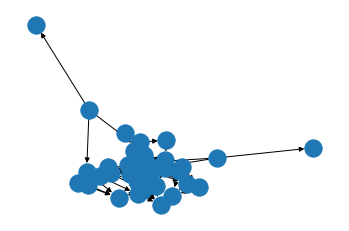

In [ ]:
preference_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
preference_ctrl.view()


In [ ]:
preference_fis = ctrl.ControlSystemSimulation(preference_ctrl)
preference_fis.input['enviroment'] = 10
preference_fis.input['taste'] = 70
preference_fis.input['user_review'] = 60
preference_fis.input['budget'] = 10
preference_fis.input['location'] = 10
preference_fis.compute()
print(preference_fis.output['preference'])
preference.view(sim = preference_fis)

ValueError: ignored